# Shap Values

-https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d 
-https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html#boosted_tree
-https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c

In [2]:
import sys,os
import csv
import pickle
import scipy
import numpy as np
from IPython.display import clear_output
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
import sklearn.model_selection
import itertools
import json
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import pandas as pd
from train_configurations import *

# Configurations

In [3]:
nations_params ={
    "IT":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "FR":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "ES":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "DE":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "AT":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "NL":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "IT_speeches":{
        "model":"RandomForest",
        "target": "AUC",
        "random_state":2
    },
    "IT_manual":{
        "model":"GradientBoosting",
        "target": "F1",
        "random_state":1
    },
    "IT_resh":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
    "AT_new":{
        "model":"GradientBoosting",
        "target": "AUC",
        "random_state":1
    },
}

# Test

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


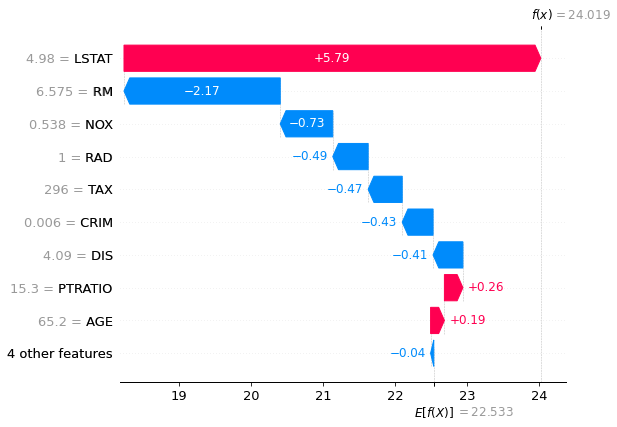

In [3]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Shap

In [4]:
nation = "IT_manual"

In [5]:
print("reading model for {}...".format(nation))
model_type, target, random_state = nations_params[nation].values()

params = pickle.load(open("./models/{0}_{1}_{2}_{3}_best_model_params.pkl".format(nation, model_type, target, random_state),'rb'))
model = pickle.load(open("./models/{0}_{1}_{2}_{3}_best_model.pkl".format(nation, model_type, target, random_state),"rb"))
indexes_test = pickle.load(open("./models/{0}_{1}_{2}_{3}_test_indexes.pkl".format(nation, model_type, target, random_state),'rb'))
max_thresh = params["threshold"]

print("reading test data for {}...".format(nation))
X = pickle.load(open("./bow_and_labels/X_{}_sentences.pkl".format(nation), "rb"))
Y = pickle.load(open("./bow_and_labels/Y_{}_sentences.pkl".format(nation), "rb"))
parties = pickle.load(open("./bow_and_labels/parties_{}_sentences.pkl".format(nation), "rb"))
years = pickle.load(open("./bow_and_labels/years_{}_sentences.pkl".format(nation), "rb"))
word_2_index = pickle.load(open("./bow_and_labels/word_index_{}.pkl".format(nation), "rb"))
index_2_word = {index:word for word, index in word_2_index.items()}

X = pd.DataFrame(X)
X = X.rename(columns={c:index_2_word[c] for c in X.columns})
Y = Y.astype(bool)
X

reading model for IT_manual...
reading test data for IT_manual...


,südtirol,autonom,garant,sicherheit,süd,tirol,südtiroler,gestaltet,konkr,schritt,...,sortegg,circoscritt,democratellum,tap,241,sinfon,franceschin,varieg,professionist,antidoping
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Importance

Text(0.5, 0, 'RF feat. importance')

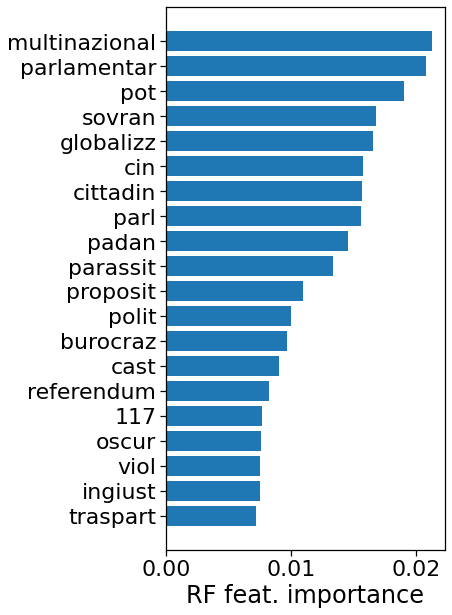

In [6]:
indices = model.feature_importances_.argsort()[::-1]
feat_imp = model.feature_importances_[indices]
word_importance = [index_2_word[index] for index in indices]

sns.set_context("notebook", font_scale=2)

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(111)


max_feat = 20
x = range(max_feat)
y = feat_imp[:max_feat][::-1]
y_lab = word_importance[:max_feat][::-1]
ax.barh(x,y)
yt = ax.set_yticks(x)
yt_lab = ax.set_yticklabels(y_lab)
ax.set_xlabel("RF feat. importance")

# Shap Values

In [7]:
print("Splitting train+validation and test sets")

indexes_train = list(set(range(X.shape[0])) - set(indexes_test))
X_train, Y_train = X.loc[indexes_train], Y[indexes_train]
X_test, Y_test = X.loc[indexes_test], Y[indexes_test]

Splitting train+validation and test sets


In [8]:
explainer = shap.Explainer(model, approximate=True)
shap_values = explainer(X_test)
pickle.dump(shap_values, open("./shap_figures_and_results/shap_values_{}.pkl".format(nation),"wb"))

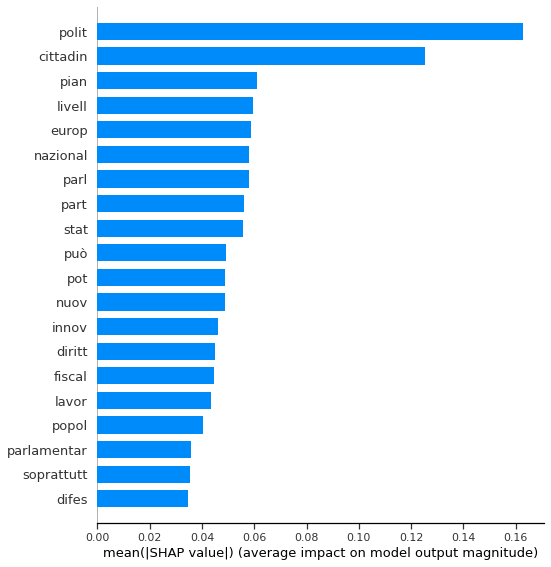

In [9]:
shap.summary_plot(shap_values, X_test,plot_type="bar", max_display=20)

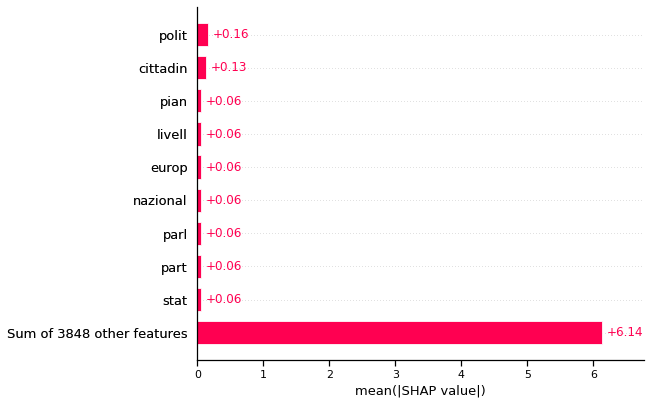

In [11]:
shap.plots.bar(shap_values)


In [1]:
##MAYBE SLOW!!
# clustering = shap.utils.hclust(X_test, Y_test)
# shap.plots.bar(shap_values, clustering=clustering)


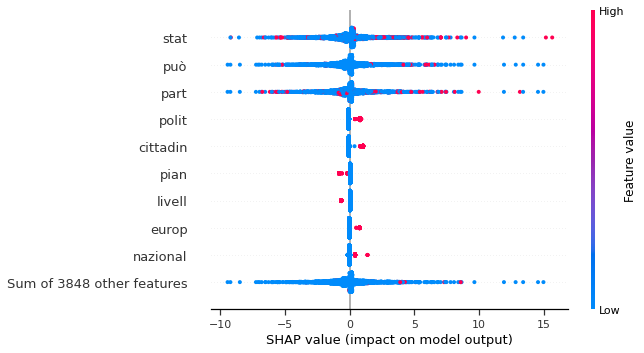

In [60]:
shap.plots.beeswarm(shap_values, max_display=10)


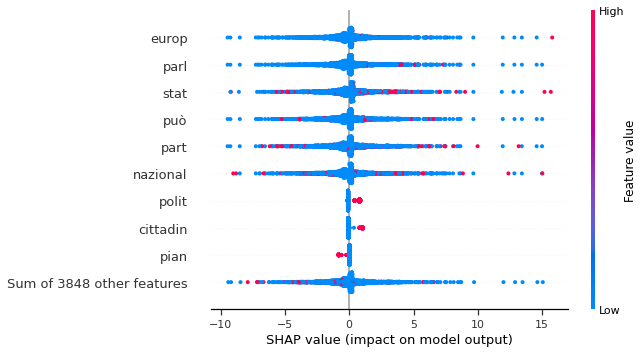

In [63]:
shap.plots.beeswarm(shap_values, max_display=10, order=shap_values.abs.mean(0))
